In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

warnings.filterwarnings('ignore')

# Clase para Análisis Exploratorio de Datos (EDA)
class EDA:
    def __init__(self, df):
        self.df = df

    def analyze(self):
        """Muestra información básica, valores nulos, boxplots y la matriz de correlación"""
        print("\n Información del dataset:")
        print(self.df.info())
        print("\n Primeras 5 filas:")
        print(self.df.head())
        print("\n Estadísticas descriptivas:")
        print(self.df.describe())

        # Visualizar valores nulos
        plt.figure(figsize=(10,5))
        sns.heatmap(self.df.isnull(), cbar=False, cmap="viridis")
        plt.title("Mapa de valores nulos")
        plt.show()

        # Boxplots para detectar outliers
        plt.figure(figsize=(15,8))
        self.df.boxplot(rot=45, grid=False)
        plt.title("Boxplots de las variables")
        plt.show()

        # Matriz de correlación
        plt.figure(figsize=(12,8))
        sns.heatmap(self.df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title("Matriz de Correlación")
        plt.show()

# Clase para Algoritmos No Supervisados
class UnsupervisedLearning:
    def __init__(self, df):
        self.df = df
        self.X_scaled = StandardScaler().fit_transform(df)  # Normalización automática

In [97]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

class UnsupervisedLearning:
    def __init__(self, df):
        self.df = df
        self.X_scaled = StandardScaler().fit_transform(df)  # Normalización automática

    def apply_hac(self):
        """Aplica Clustering Jerárquico (HAC) con valores por defecto y asigna clusters"""
        
        # Definir parámetros por defecto
        k = 4  # Número de clusters
        linkage_method = 'complete'  # Método de enlace

        # Paso 1: Calcular linkage
        linked = linkage(self.X_scaled, method=linkage_method)

        # Paso 2: Visualizar el dendrograma
        plt.figure(figsize=(10, 5))
        dendrogram(linked)
        plt.title("Dendrograma - Clustering Jerárquico")
        plt.xlabel("Muestras")
        plt.ylabel("Distancia")
        plt.show()

        # Paso 3: Asignar los clusters
        clusters = fcluster(linked, k, criterion='maxclust')
        self.df['Cluster'] = clusters
        print("HAC aplicado correctamente")
        print(self.df.head())

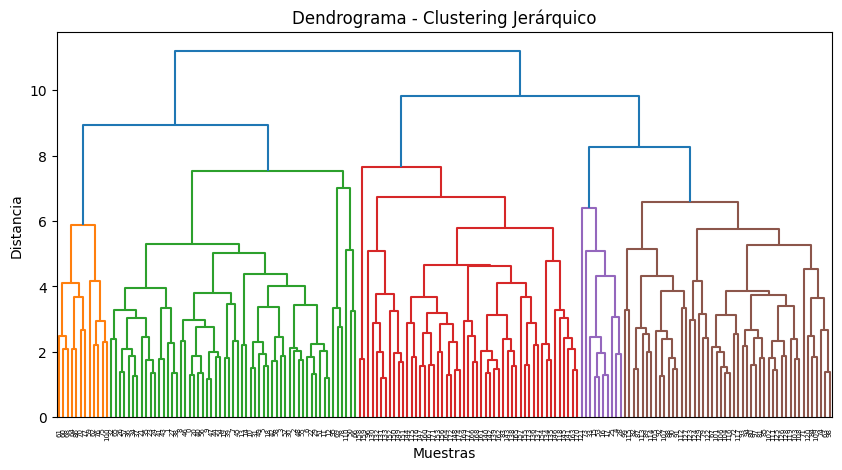

HAC aplicado correctamente
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        2  
1   3.4

In [105]:
# Cargar los datos
data_path = "C:\\Users\\Jorge\\OneDrive\\Documentos\\Jorge\\LEAD university\\2025\\Mineria de datos avanzada\\Caso de estudio 1\\wine-clustering.csv"
df = pd.read_csv(data_path)

# Aplicar HAC (sin pasar parámetros, ya que están en la función)
unsupervised = UnsupervisedLearning(df)
unsupervised.apply_hac()

In [99]:
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist

# Asegurémonos de que X_scaled esté definido (normalización)
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df)  # Suponiendo que df es tu dataset

# Aplicamos el método de enlace jerárquico (Ward es común para clustering)
Z = linkage(X_scaled, method='complete')  

# Calculamos la distancia cophenética
coph_corr, _ = cophenet(Z, pdist(X_scaled))

print(f"Coeficiente de correlación cophenética: {coph_corr}")


Coeficiente de correlación cophenética: 0.6810390096979926


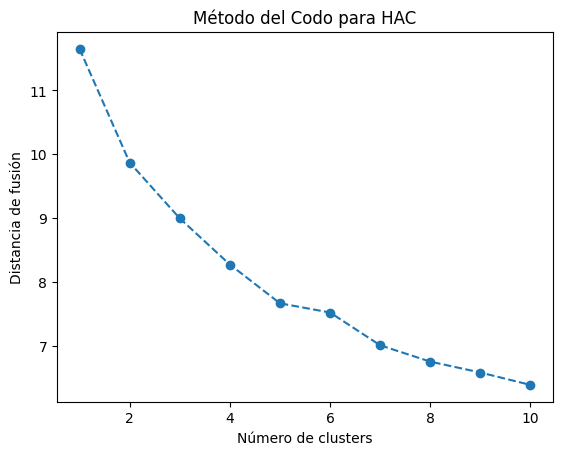

In [100]:
import scipy.cluster.hierarchy as sch

# Calcular la distancia entre los clusters
distances = sch.linkage(X_scaled, method='complete')

# Graficar el codo basado en las distancias
last = distances[-10:, 2]  # Últimas 10 fusiones
k_values = range(1, len(last) + 1)

plt.plot(k_values, last[::-1], marker='o', linestyle='--')
plt.xlabel("Número de clusters")
plt.ylabel("Distancia de fusión")
plt.title("Método del Codo para HAC")
plt.show()

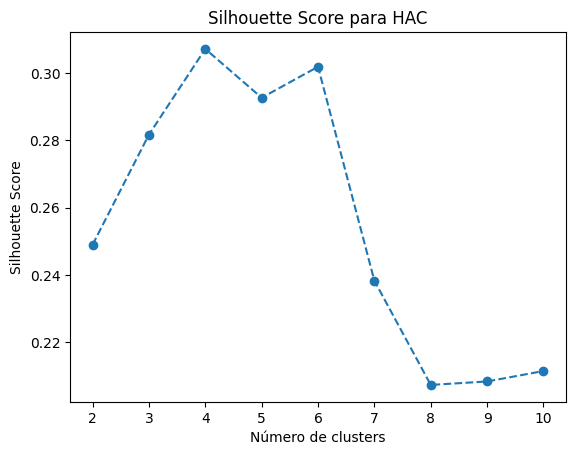

In [101]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []
for k in range(2, 11):  # Probamos de 2 a 10 clusters
    hac = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hac.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score para HAC")
plt.show()

In [107]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Definir el número de clusters a partir del dendrograma (ajústalo según el gráfico)
n_clusters = 6

# Obtener etiquetas de clusters desde el dendrograma
labels = fcluster(Z, n_clusters, criterion='maxclust')

# Calcular el coeficiente de Silhouette
sil_score = silhouette_score(X_scaled, labels)

print(f"Coeficiente de Silhouette: {sil_score:.4f}")

Coeficiente de Silhouette: 0.2685


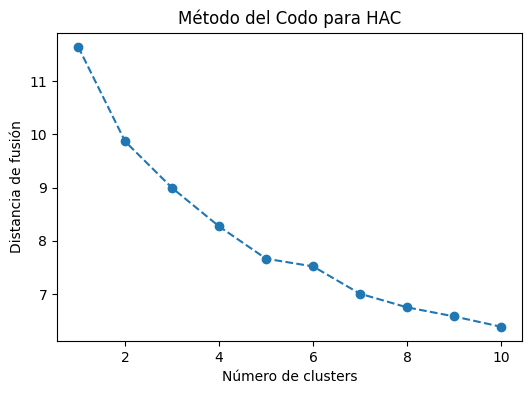

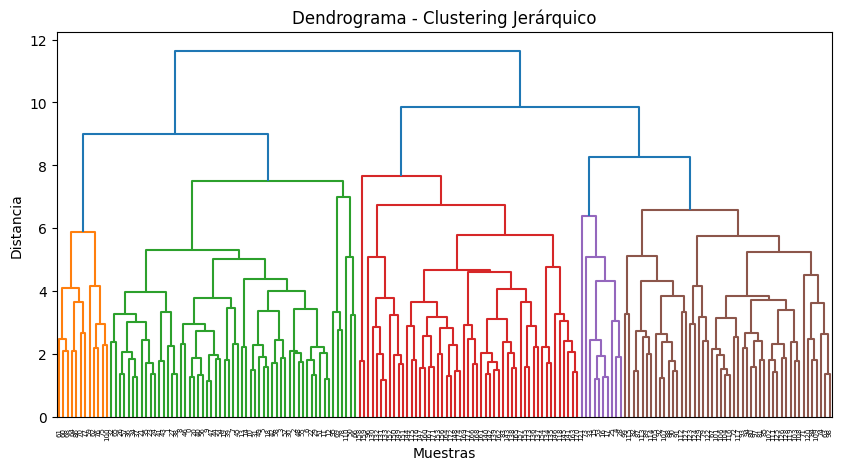

HAC aplicado correctamente
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        2  
1   3.4

In [117]:
# Definir parámetros por defecto
linkage_method = 'complete'  # Método de enlace

# Paso 1: Calcular linkage
linked = linkage(X_scaled, method=linkage_method)

# Paso 2: Graficar el método del codo
last = linked[-10:, 2]  # Últimas 10 fusiones
k_values = range(1, len(last) + 1)

plt.figure(figsize=(6, 4))
plt.plot(k_values, last[::-1], marker='o', linestyle='--')
plt.xlabel("Número de clusters")
plt.ylabel("Distancia de fusión")
plt.title("Método del Codo para HAC")
plt.show()

        # Paso 3: Determinar número óptimo de clusters (ajusta según el gráfico)
k = 6  

        # Paso 4: Visualizar el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Muestras")
plt.ylabel("Distancia")
plt.show()

        # Paso 5: Asignar los clusters
clusters = fcluster(linked, k, criterion='maxclust')
df['Cluster'] = clusters
print("HAC aplicado correctamente")
print(df.head())

# Paso 6: Calcular el coeficiente de Silhouette
sil_score = silhouette_score(X_scaled, clusters)
print(f"Coeficiente de Silhouette: {sil_score:.4f}")

print(np.unique(clusters, return_counts=True))

In [108]:
import sklearn
import numpy as np
import scipy

print("scikit-learn:", sklearn.__version__)
print("numpy:", np.__version__)
print("scipy:", scipy.__version__)


scikit-learn: 1.6.1
numpy: 1.26.4
scipy: 1.15.2


In [110]:
print(pd.DataFrame(X_scaled).head())

         0         1         2         3         4         5         6   \
0  1.518613 -0.562250  0.232053 -1.169593  1.913905  0.808997  1.034819   
1  0.246290 -0.499413 -0.827996 -2.490847  0.018145  0.568648  0.733629   
2  0.196879  0.021231  1.109334 -0.268738  0.088358  0.808997  1.215533   
3  1.691550 -0.346811  0.487926 -0.809251  0.930918  2.491446  1.466525   
4  0.295700  0.227694  1.840403  0.451946  1.281985  0.808997  0.663351   

         7         8         9         10        11        12        13  
0 -0.659563  1.224884  0.251717  0.362177  1.847920  1.013009 -0.918382  
1 -0.820719 -0.544721 -0.293321  0.406051  1.113449  0.965242 -0.918382  
2 -0.498407  2.135968  0.269020  0.318304  0.788587  1.395148 -0.918382  
3 -0.981875  1.032155  1.186068 -0.427544  1.184071  2.334574 -0.918382  
4  0.226796  0.401404 -0.319276  0.362177  0.449601 -0.037874  1.190935  


In [121]:
from sklearn.metrics import pairwise_distances
# Calcular matriz de distancia
distances = pairwise_distances(X_scaled, metric="euclidean")

# Calcular Silhouette manualmente
sil_scores = []
for i in range(len(X_scaled)):
    same_cluster = clusters == clusters[i]
    other_clusters = clusters != clusters[i]

    a_i = np.mean(distances[i, same_cluster])  # Distancia intra-cluster
    b_i = np.min([np.mean(distances[i, clusters == label]) for label in np.unique(clusters) if label != clusters[i]])  # Distancia a otros clusters

    sil_scores.append((b_i - a_i) / max(a_i, b_i))

# Promedio de los coeficientes de Silhouette
manual_silhouette = np.mean(sil_scores)
print(f"Silhouette Score manual: {manual_silhouette:.4f}")

Silhouette Score manual: 0.2910


In [123]:
print(pd.DataFrame(X_scaled).head())

         0         1         2         3         4         5         6   \
0  1.518613 -0.562250  0.232053 -1.169593  1.913905  0.808997  1.034819   
1  0.246290 -0.499413 -0.827996 -2.490847  0.018145  0.568648  0.733629   
2  0.196879  0.021231  1.109334 -0.268738  0.088358  0.808997  1.215533   
3  1.691550 -0.346811  0.487926 -0.809251  0.930918  2.491446  1.466525   
4  0.295700  0.227694  1.840403  0.451946  1.281985  0.808997  0.663351   

         7         8         9         10        11        12        13  
0 -0.659563  1.224884  0.251717  0.362177  1.847920  1.013009 -0.918382  
1 -0.820719 -0.544721 -0.293321  0.406051  1.113449  0.965242 -0.918382  
2 -0.498407  2.135968  0.269020  0.318304  0.788587  1.395148 -0.918382  
3 -0.981875  1.032155  1.186068 -0.427544  1.184071  2.334574 -0.918382  
4  0.226796  0.401404 -0.319276  0.362177  0.449601 -0.037874  1.190935  


In [124]:
print(np.unique(clusters, return_counts=True))  # Ver cuántos elementos hay en cada cluster
print(clusters[:10])  # Primeros 10 valores de clusters


(array([1, 2, 3, 4, 5, 6], dtype=int32), array([12, 57,  2, 49, 10, 48], dtype=int64))
[2 2 2 2 5 2 2 2 2 2]


In [125]:
from sklearn.metrics import pairwise_distances

# Calculamos la matriz de distancias
dist_matrix = pairwise_distances(X_scaled)

# Revisamos algunas filas
print(dist_matrix[:5, :5])  # Solo una parte para comparar
print(np.mean(dist_matrix), np.std(dist_matrix))  # Estadísticas generales


[[0.         3.49753522 3.02660794 2.84250465 4.14387084]
 [3.49753522 0.         4.1429119  4.36061508 5.0855384 ]
 [3.02660794 4.1429119  0.         3.24648617 3.6518784 ]
 [2.84250465 4.36061508 3.24648617 0.         4.96617068]
 [4.14387084 5.0855384  3.6518784  4.96617068 0.        ]]
5.078010862101129 1.4878863143341778


In [126]:
X_scaled[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893, -0.91838247],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152, -0.91838247],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818, -0.91838247],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383, -0.91838247],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44

In [127]:
print("Forma de X antes de escalar:", X.shape)
print("Forma de X después de escalar:", X_scaled.shape)
print("Primeras filas de X_scaled:")
print(X_scaled[:5])

NameError: name 'X' is not defined